# Determinant QMC data visualization

## Load simulation data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

# Are you testing (0) or making plots (1)?

SAVEPLOTS = bool(0) # 0 for false, 1 for true

# Retrieve simulation parameters

simulationParameters = np.loadtxt('simulationParameters.txt', usecols = 1)

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])
intsize = int(simulationParameters[9])

# Load weights to plot

measurements = np.loadtxt('measurementsScalars.txt', skiprows = 1)

weights = measurements[:, 0]

M = weights.size

time = np.arange(M) + 1  #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
            
if not os.path.exists(directory1):
    os.makedirs(directory1)
    
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
np.savetxt(directory2 + '/weights_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (weights))
np.savetxt(directory2 + '/simulationParameters_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (simulationParameters))

# Metropolis Sampling convergence

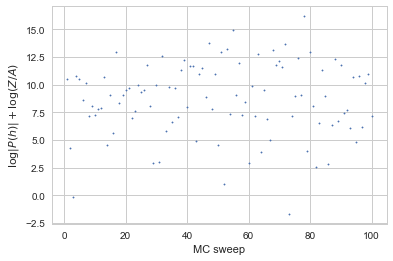

In [12]:
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.scatter(time, np.log(abs(weights)), s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\log | P(h) | + \log (Z/A)$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600)

# Sign problem

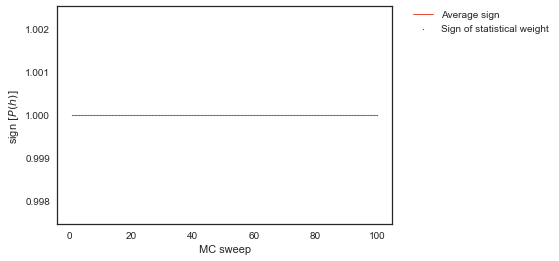

In [13]:
sns.set_style("white")
signs = measurements[:, 1]
avSign = np.mean(signs) * np.ones(len(time))
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.set_color_codes("dark")

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlabel('MC sweep')
plt.ylabel('sign' + r' $[P(h)]$ ')

ax.scatter(time, signs, s = 1, color = "#34495e", label = 'Sign of statistical weight')
ax.plot(time, avSign, linewidth = 1, color = "#e74c3c", label = 'Average sign')
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/avSign' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600,
                bbox_extra_artists=(lgd,), bbox_inches='tight')

# Measuring electron density

In [14]:
electronDensity = measurements[:, 2] - 1 # - 1 for 2 sites
np.savetxt(directory2 + '/electronDensity' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (electronDensity))

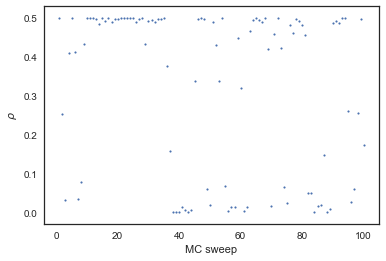

In [15]:
plt.scatter(time, electronDensity, s = 3)
plt.xlabel('MC sweep')
plt.ylabel(r'$\rho$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/electronDensity' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600)

In [16]:
np.mean(electronDensity)

0.32367759101000004

In [17]:
np.sqrt( np.var(electronDensity)  / electronDensity.size)

0.020932346931710935

In [8]:
0.0625**2

0.00390625

In [42]:
doubleOc = measurements[:, 3]
np.savetxt(directory2 + '/doubleOc' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (doubleOc))

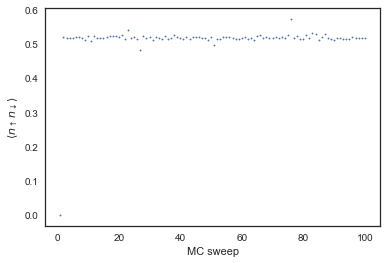

In [43]:
plt.scatter(time, doubleOc, s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\left\langle n_\uparrow n_\downarrow \right\rangle$')
if SAVEPLOTS == 1:
    plt.savefig(directory1 + '/doubleOc' + str(totalMCSweeps) + 'sweeps' + \
                '_freq_' + str(freq) + '.png', dpi = 600)

# Auto-correlation time

In [44]:
m = np.mean(doubleOc)
m

0.5138759118620001

In [45]:
tMax = int(totalMCSweeps / 10)
chi1 = np.zeros(tMax)
chi2 = np.zeros(tMax)
doubleTrunc = doubleOc[:tMax]
densTrunc = electronDensity[:tMax]

In [32]:
for i in range(tMax):
    chi1[i] = np.sum( ( doubleOc[:tMax] - m ) * ( doubleOc[i:i + tMax] - m ) )
    chi2[i] = np.sum( ( electronDensity[:tMax] - m ) * ( electronDensity[i:i + tMax] - m ) )

In [33]:
doubleOc[4:4+tMax].size

204

In [34]:
doubleOc[:tMax].size

204

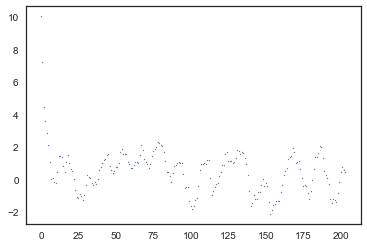

In [35]:
plt.scatter(np.arange(tMax)[:400], chi2[:400], s = 1)

In [40]:
densityTrunc = np.zeros(int(totalMCSweeps  / 800) + 1)
for t_ in time:
    if t_ % 800 == 0:
        densityTrunc[int(t_ / 800)] = doubleOc[t_]

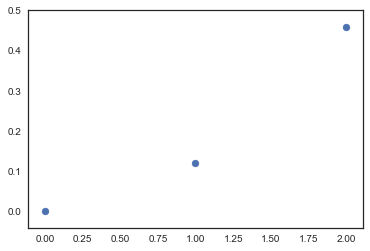

In [41]:
plt.scatter(np.arange(densityTrunc.size), densityTrunc)

In [42]:
np.mean(densityTrunc)

0.19340262186666665

In [43]:
np.var(densityTrunc)

0.037817057569402762

# Magnetic structure factor

Text(0,0.5,'S(q)')

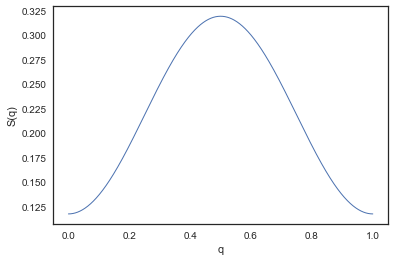

In [9]:
import cmath as cm

magCorrMeas = np.loadtxt('measurementsCorrelations.txt', skiprows = 1)

magCorr = np.zeros((NSITES, NSITES))

# Average spin-spin correlation function

for m in range(totalMCSweeps):
    magCorr += ( magCorrMeas[m*NSITES:(m+1)*NSITES] - magCorr ) / ( m + 1)
    
# Compute structure factor    
    
n_qs = 5000
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)
S = np.zeros(n_qs+1)*1j

for idx, q in enumerate(qs):
    for x in range(NSITES):
        for y in range(NSITES):
            S[idx] += cm.exp( ( x - y) * q  * 1j) * magCorr[x, y]

S /= (8 * NSITES) # factor of 8 comes from 1/2 spins

plt.plot(qs/2/np.pi, S.real, linewidth = 1)
plt.xlabel(r'q')
plt.ylabel(r'S(q)')

In [12]:
qs[np.argmax(S)] 

3.1415926535897931

In [48]:
np.argmax(S)

1285